# TIME SERIES PREDICTION STATEWISE -- KERALA, MAHARASHTRA (in depth analysis) and DELHI  - TILL 29th APRIL 2020

In [177]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
import mplcursors
import datetime
from pmdarima.arima import auto_arima
from fbprophet import Prophet
import statsmodels.api as sm
import matplotlib.dates as mdates

In [360]:
#https://machinelearningmastery.com/make-sample-forecasts-arima-python/
states =['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan', 'Uttar Pradesh',
 'Tamil Nadu', 'Ladakh', 'Karnataka', 'Maharashtra', 'Punjab',
 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry',
 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh',
 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
 'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
 'Arunachal Pradesh', 'Tripura', 'Meghalaya']

In [361]:
df_state_recs =[]

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

for j in range(0, len(states)):
    stateName = states[j]
    df_per_State_features = pd.read_csv('features/' + stateName +'.csv')
    df_per_State_features = df_per_State_features.fillna(0)
    df_per_State_features["Active Cases"].replace({0:1}, inplace=True)
    df_state_recs.append(df_per_State_features)

# Analysis for Kerala

In [530]:
df_per_State_features = df_state_recs[0]
stateName = states[0]
data = df_per_State_features['Active Cases'].astype('int').values
    
daterange = df_per_State_features['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]


index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
activecases = pd.Series(data, index)


(737485.0, 737546.0)

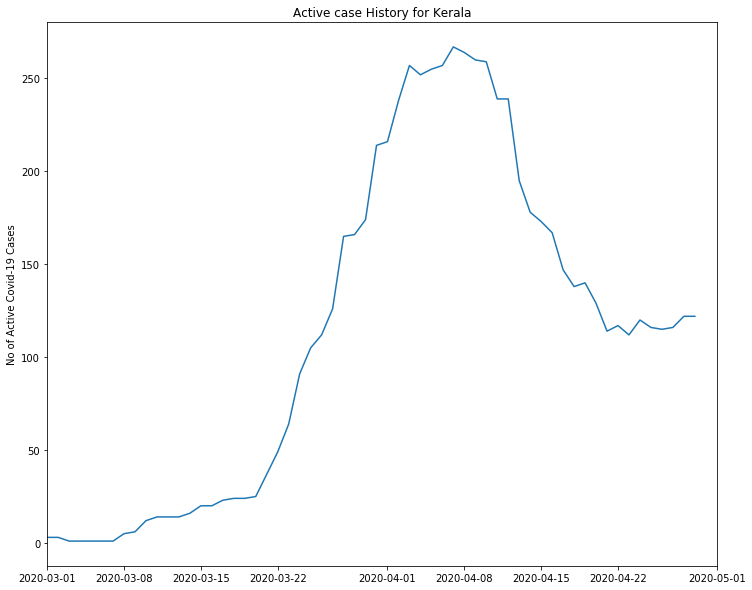

In [363]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(activecases)
ax.set_ylabel("No of Active Covid-19 Cases")
title = 'Active case History for ' + stateName
ax.set_title(title)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 5, 1)])


# Tseries Simple  Exponential Smoothing prediction for a period of 2 months 

Root Mean Square Error Holt's Linear Model:  90.80315419169916
(28,)
(28,)


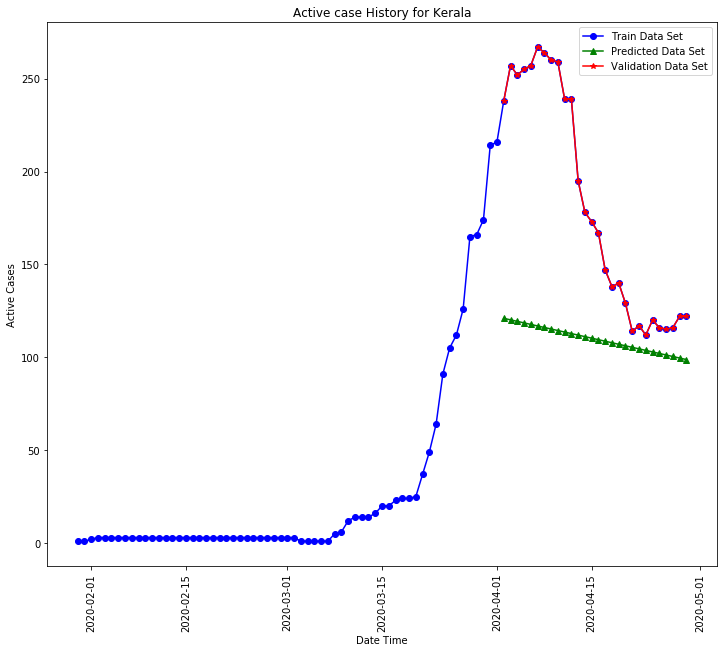

In [433]:
model_train=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]
data = valid['Active Cases'].astype('int').values

holt=Holt(np.asarray(df_per_State_features["Active Cases"])).fit(smoothing_level=1.2, smoothing_slope=0.2,optimized=False)
y_pred=valid.copy()

y_pred["Active Cases"]=holt.forecast(len(valid))
model_scores = []
model_scores.append(np.sqrt(mean_squared_error(valid["Active Cases"],y_pred["Active Cases"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(valid["Active Cases"],y_pred["Active Cases"])))

dateStart = daterange[int(df_per_State_features.shape[0]*0.70)]
index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
predCases = pd.Series(holt.forecast(len(valid)), index)

index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
predValid = pd.Series(data, index)

print(np.shape(index))
print(np.shape(predCases))

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(activecases, marker='o', color='blue', label="Train Data Set")
plt.plot(predCases, marker='^', color='green', label ="Predicted Data Set")
plt.plot(predValid, marker='*', color='red', label="Validation Data Set")
ax.set_ylabel("No of Active Covid-19 Cases")
title = 'Active case History for ' + stateName
ax.set_title(title)
plt.ylabel("Active Cases")
plt.xlabel("Date Time")
plt.xticks(rotation=90)
plt.legend()


# plt.figure(figsize=(10,5))
# ax = plt.plot(model_train["Date"], model_train["Active Cases"],label="Train Set",marker='o')
# valid["Active Cases"].plot(label="Validation Set",marker='*')
# plt.plot(valid["Date"], y_pred["Active Cases"], label="Holt's Linear Model Predicted Set",marker='^')
# plt.ylabel("Confirmed Cases")
# plt.xlabel("Date Time")
# plt.title("Confirmed Holt's Linear Model Prediction")
# plt.xticks(rotation=90)
# #ax.set_xlim(dateStart, dateEnd)
# #plt.xlim([dateStart, dateEnd])
# plt.legend()

# Simple and Exponential Smoothing TSeries Prediction

In [510]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

In [511]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]

fit1 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(len_forecast).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(len_forecast).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit()
fcast3 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fit4 = ExponentialSmoothing(df_per_State_features['Active Cases']).fit(damping_slope=.2, smoothing_level=.1)
fcast4 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit4.model.params['smoothing_level'])


In [512]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

pred_fcast4 =  pd.Series(fcast4.values, pred_index)
pred_fitval_fcast4 =  pd.Series(fit4.fittedvalues.values, index)


Text(0.5, 1.0, 'Active case Flattening curve for Kerala')

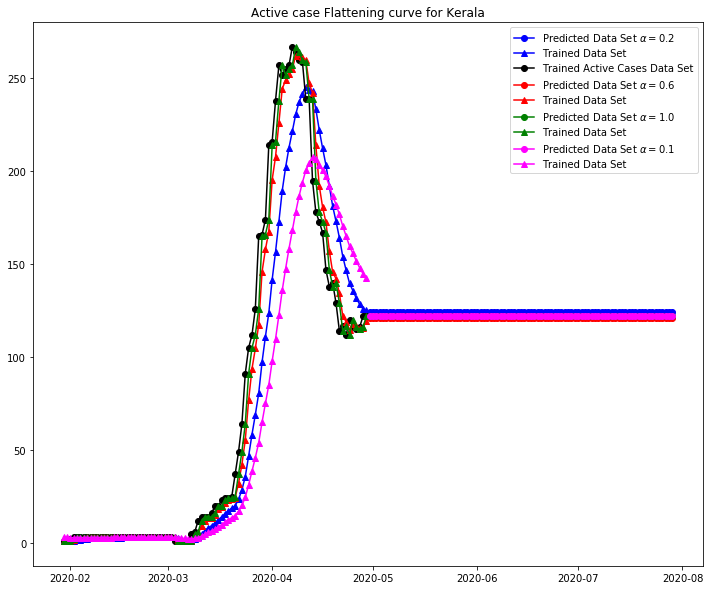

In [513]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Data Set " + r'$\alpha=0.2$')
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Data Set")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Data Set " + r'$\alpha=0.6$')
plt.plot(pred_fitval_fcast2, marker='^',color='red',label ="Trained Data Set")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Data Set " + r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Data Set")

plt.plot(pred_fcast4, marker='o',color='magenta',label ="Predicted Data Set " r'$\alpha=%s$'%fit4.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast4, marker='^',color='magenta',label ="Trained Data Set")

plt.legend()
ax.set_title('Active case Flattening curve for ' + stateName)


# Holt's Winter Tseries Prediction

In [537]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

In [538]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]
fit1 = Holt(df_per_State_features['Active Cases']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(len_forecast).rename("Holt's linear trend")
fit2 = Holt(df_per_State_features['Active Cases'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(len_forecast).rename("Exponential trend")
fit3 = Holt(df_per_State_features['Active Cases'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(len_forecast).rename("Additive damped trend")

In [539]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

Text(0.5, 1.0, "Holt's Winter Time Series Active Cases Prediction to Flatten the curve for Kerala")

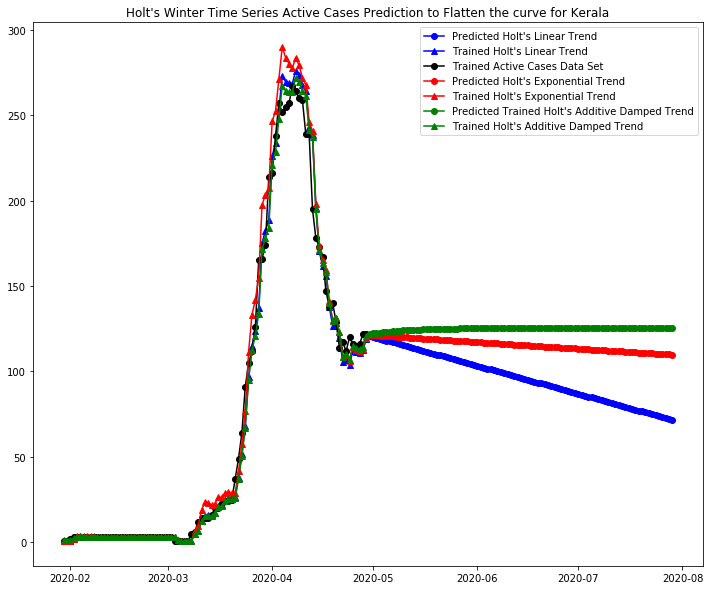

In [540]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Holt\'s Linear Trend")
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Holt\'s Linear Trend")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Holt\'s Exponential Trend")
plt.plot(pred_fitval_fcast2, marker='^',color='red',label = "Trained Holt\'s Exponential Trend")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Trained Holt\'s Additive Damped Trend")
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Holt\'s Additive Damped Trend")

plt.legend()
ax.set_title('Holt\'s Winter Time Series Active Cases Prediction to Flatten the curve for ' + stateName)

In [541]:
fit1 = SimpleExpSmoothing(activecases).fit()
fit2 = Holt(activecases).fit()
fit3 = Holt(activecases,exponential=True).fit()
fit4 = Holt(activecases,damped=True).fit(damping_slope=0.98)
fit5 = Holt(activecases,exponential=True,damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.0,0.631579,0.743490,0.631579,0.640325
$\beta$,NaN,0.631579,0.633726,0.631579,0.640296
$\phi$,NaN,NaN,NaN,0.980000,0.813674
$l_0$,1.0,1.000000,0.742306,1.000000,0.975022
$b_0$,NaN,0.010000,1.832489,0.010000,1.357957
SSE,9645.0,6262.912330,7848.765796,6153.053327,6064.943636


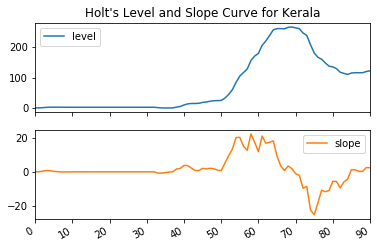

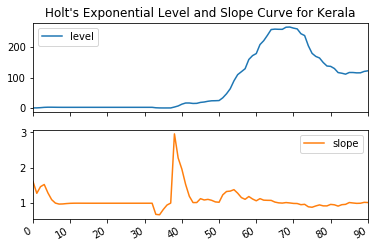

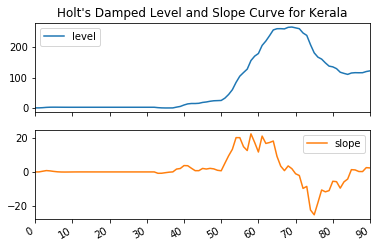

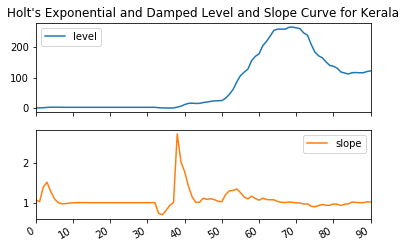

In [542]:
title_sub = ['Holt\'s',  'Holt\'s Exponential', 'Holt\'s Damped', 'Holt\'s Exponential and Damped']
count = 0
for fit in [fit2, fit3, fit4, fit5]:
    ax = pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)

    title = title_sub[count] + ' Level and Slope Curve for ' +  stateName
    ax[0].set_title(title)
    count = count + 1 

# Analysis for Delhi


In [545]:
df_per_State_features = df_state_recs[1]
stateName = states[1]
data = df_per_State_features['Active Cases'].astype('double').values
    
daterange = df_per_State_features['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]


index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
activecases = pd.Series(data, index)

(737485.0, 737546.0)

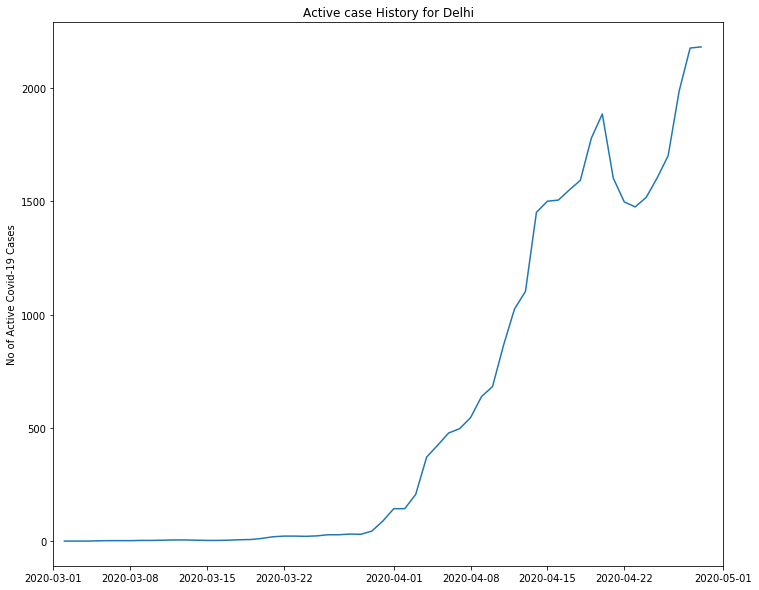

In [544]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(activecases)
ax.set_ylabel("No of Active Covid-19 Cases")
title = 'Active case History for ' + stateName
ax.set_title(title)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 5, 1)])

# Simple Exponential Smoothing and Holt's Winter model Prediction

In [516]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

In [517]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]

fit1 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(len_forecast).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(len_forecast).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit()
fcast3 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fit4 = ExponentialSmoothing(df_per_State_features['Active Cases']).fit(damping_slope=.2, smoothing_level=.1)
fcast4 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit4.model.params['smoothing_level'])

In [518]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

pred_fcast4 =  pd.Series(fcast4.values, pred_index)
pred_fitval_fcast4 =  pd.Series(fit4.fittedvalues.values, index)


Text(0.5, 1.0, 'Active case Flattening curve for Delhi')

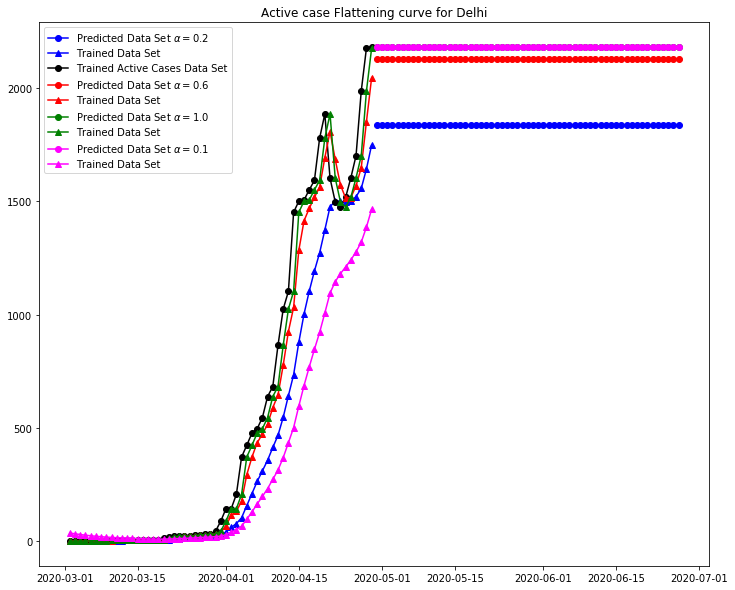

In [519]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Data Set " + r'$\alpha=0.2$')
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Data Set")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Data Set " + r'$\alpha=0.6$')
plt.plot(pred_fitval_fcast2, marker='^',color='red',label ="Trained Data Set")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Data Set " + r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Data Set")

plt.plot(pred_fcast4, marker='o',color='magenta',label ="Predicted Data Set " r'$\alpha=%s$'%fit4.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast4, marker='^',color='magenta',label ="Trained Data Set")

plt.legend()
ax.set_title('Active case Flattening curve for ' + stateName)

# Holt's Winter Tseries Prediction

In [546]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

In [547]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]
fit1 = Holt(df_per_State_features['Active Cases']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(len_forecast).rename("Holt's linear trend")
fit2 = Holt(df_per_State_features['Active Cases'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(len_forecast).rename("Exponential trend")
fit3 = Holt(df_per_State_features['Active Cases'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(len_forecast).rename("Additive damped trend")

In [548]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

Text(0.5, 1.0, "Holt's Winter Time Series Active Cases Prediction to Flatten the curve for Delhi")

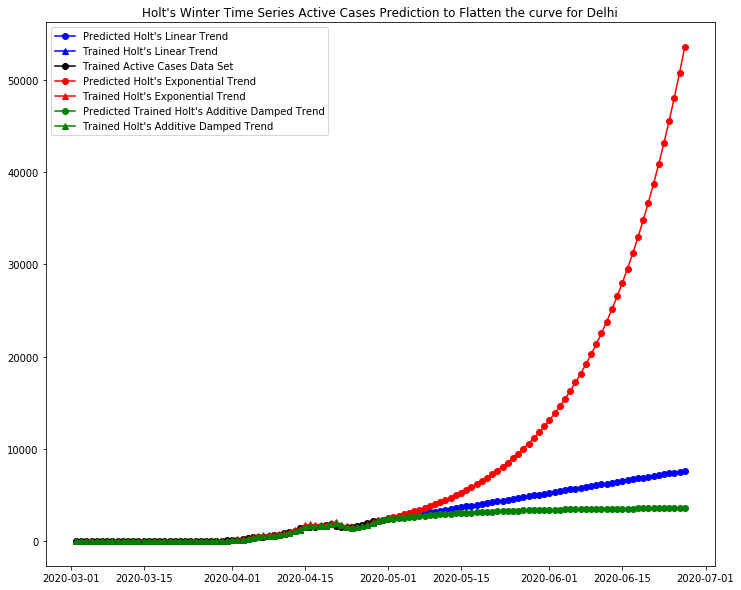

In [549]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Holt\'s Linear Trend")
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Holt\'s Linear Trend")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Holt\'s Exponential Trend")
plt.plot(pred_fitval_fcast2, marker='^',color='red',label = "Trained Holt\'s Exponential Trend")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Trained Holt\'s Additive Damped Trend")
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Holt\'s Additive Damped Trend")

plt.legend()
ax.set_title('Holt\'s Winter Time Series Active Cases Prediction to Flatten the curve for ' + stateName)


In [550]:
fit1 = SimpleExpSmoothing(activecases).fit()
fit2 = Holt(activecases).fit()
fit3 = Holt(activecases,exponential=True).fit()
fit4 = Holt(activecases,damped=True).fit(damping_slope=0.98)
fit5 = Holt(activecases,exponential=True,damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.0,1.000000,1.000000,1.000000,1.000000
$\beta$,NaN,0.129842,0.000000,0.195903,1.000000
$\phi$,NaN,NaN,NaN,0.980000,0.423662
$l_0$,1.0,0.693073,1.000000,0.967153,1.000000
$b_0$,NaN,1.787656,1.045259,0.125166,2.360369
SSE,522035.0,420735.485075,426105.821008,418845.288865,401189.930046


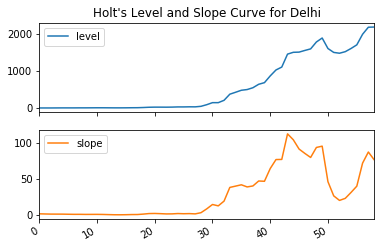

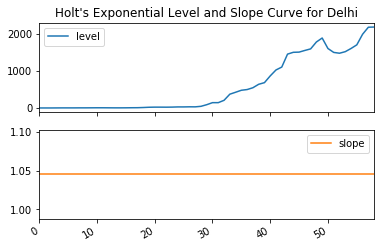

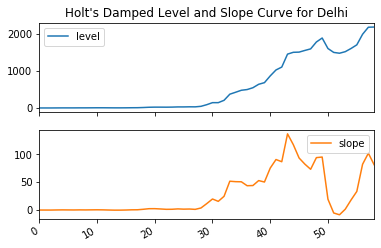

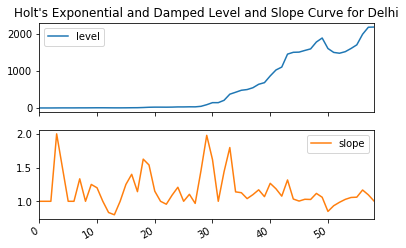

In [551]:
title_sub = ['Holt\'s', 'Holt\'s Exponential', 'Holt\'s Damped', 'Holt\'s Exponential and Damped']
count = 0
for fit in [fit2, fit3, fit4, fit5]:
    ax = pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)
    

    title = title_sub[count] + ' Level and Slope Curve for ' +  stateName
    ax[0].set_title(title)
    count = count + 1 

# Analysis for Maharashtra

# Regression Models

In [552]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df_per_State_features = df_state_recs[9]
stateName = states[9]

data = df_per_State_features['Active Cases'].astype('double').values
daterange = df_per_State_features['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]

date_index= pd.date_range(start=dateStart, end=dateEnd, freq='D')

activecases = pd.Series(data, date_index)
df_per_State_sel_features = df_per_State_features.copy(deep=False)

df_per_State_sel_features["Days Since"]=date_index-date_index[0]
df_per_State_sel_features["Days Since"]=df_per_State_sel_features["Days Since"].dt.days


df_per_State_sel_features = df_per_State_sel_features.iloc[:,[4,5, 7,8,9,10,11,12,13,14,15,16,23]]
df_per_State_sel_features.head()


,Cured/Discharged/Migrated,Death,Active Cases,LiteracyRate,PopulationDensity,ElderlyRate,DistrictsEffected,NoRedZones,NoOrangeZones,NoGreenZones,InternationalAirports,IntAirportPassenger,Days Since
0,0,0,2,82.3,365,9.9,32,14,16,6,3,67.0,0
1,0,0,5,82.3,365,9.9,32,14,16,6,3,67.0,1
2,0,0,10,82.3,365,9.9,32,14,16,6,3,67.0,2
3,0,0,11,82.3,365,9.9,32,14,16,6,3,67.0,3
4,0,0,11,82.3,365,9.9,32,14,16,6,3,67.0,4


In [553]:
data = df_per_State_features['Active Cases'].astype('double').values
daterange = df_per_State_features['Date']
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]


df_per_State_features["Days Since"]=date_index-date_index[0]
df_per_State_features["Days Since"]=df_per_State_features["Days Since"].dt.days


train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

ml_all_f =df_per_State_sel_features.values
train_ml_all_f =df_per_State_sel_features.iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_ml_all_f =df_per_State_sel_features.iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

# Linear Regression Model

In [70]:
model_scores=[]

dateVals =  df_per_State_features["Days Since"].values.reshape(-1,1)
traindateVals = dateVals[:int(df_per_State_features.shape[0]*0.70)]
validDateVals = dateVals[int(df_per_State_features.shape[0]*0.70):]

totActiveCases = activecases.values.reshape(-1,1)
trainActiveCases =totActiveCases[:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]


#model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_valid_linreg)))
#print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(validActiveCases,prediction_valid_linreg)))


In [71]:
np.shape(df_per_State_sel_features)

(52, 13)

In [72]:
np.shape(prediction_valid_linreg)

(16, 1)

In [73]:
np.shape(validActiveCases)

(16, 1)

In [74]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(validActiveCases,prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  8.198074455012805e-13


In [75]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(train_ml_all_f,trainActiveCases)
prediction_valid_linreg=lin_reg.predict(valid_ml_all_f)

# Plotting Linear Regression

(52, 13)


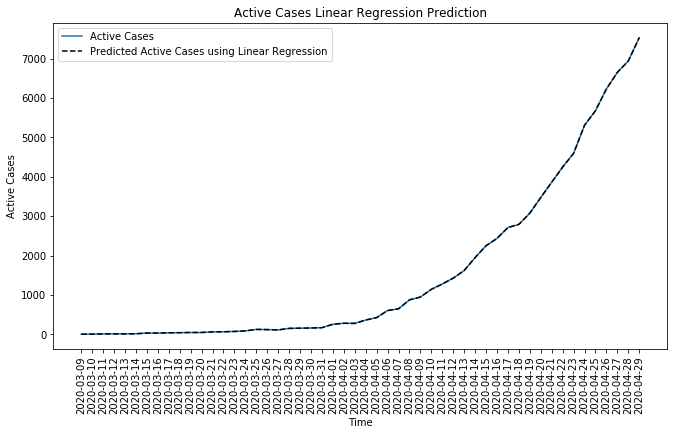

In [76]:
print(np.shape(ml_all_f))

# With multiple input features
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(ml_all_f)
plt.plot(totActiveCases,label="Active Cases")
plt.plot(df_per_State_features['Date'], prediction_linreg, linestyle='--',label="Predicted Active Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Active Cases')
plt.title("Active Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

# Polynomial Regression Model


In [77]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg = PolynomialFeatures(degree = 7) 

poly_reg = make_pipeline(PolynomialFeatures(3), Ridge())
poly_reg.fit(train_ml_all_f,trainActiveCases)
poly_pred = poly_reg.predict(valid_ml_all_f)


model_scores.append(np.sqrt(mean_squared_error(validActiveCases,poly_pred)))
print("Root Mean Square Error for Polynomial Regression: ",np.sqrt(mean_squared_error(validActiveCases,poly_pred)))

Root Mean Square Error for Polynomial Regression:  1.6829367917259446


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



# Plotting PolyNomial Regression

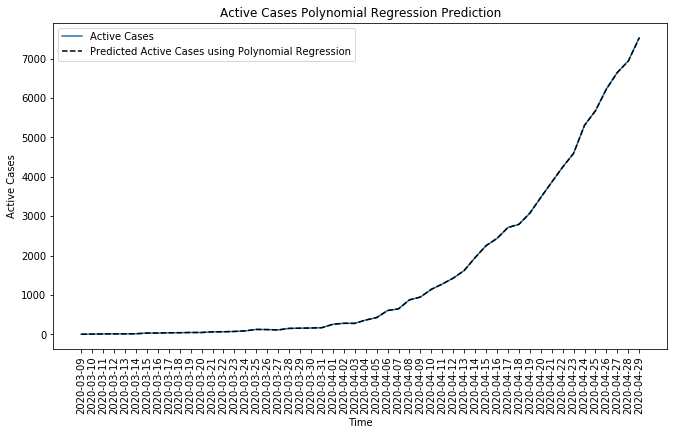

In [78]:
# With multiple input features
plt.figure(figsize=(11,6))
pred_poly=poly_reg.predict(ml_all_f)
plt.plot(totActiveCases,label="Active Cases")
plt.plot(df_per_State_features['Date'], pred_poly, linestyle='--',label="Predicted Active Cases using Polynomial Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Active Cases')
plt.title("Active Cases Polynomial Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

# Lasso  Regression

In [79]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

lasso_reg = Lasso(alpha=.8,normalize=True, max_iter=1e5)

poly_reg = make_pipeline(PolynomialFeatures(3), lasso_reg)
poly_reg.fit(train_ml_all_f,trainActiveCases)
poly_pred = poly_reg.predict(valid_ml_all_f)


model_scores.append(np.sqrt(mean_squared_error(validActiveCases,poly_pred)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(validActiveCases,poly_pred)))

Root Mean Square Error for Linear Regression:  48.73906695058717


# Plotting Lasso Regression

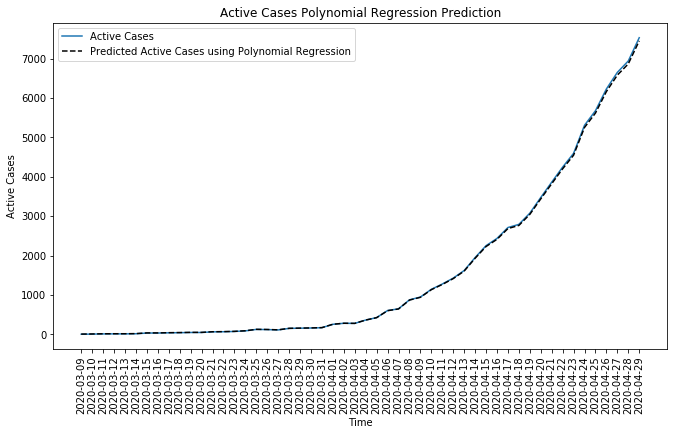

In [80]:
# With multiple input features
plt.figure(figsize=(11,6))
pred_poly=poly_reg.predict(ml_all_f)
plt.plot(totActiveCases,label="Active Cases")
plt.plot(df_per_State_features['Date'], pred_poly, linestyle='--',label="Predicted Active Cases using Polynomial Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Active Cases')
plt.title("Active Cases Polynomial Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

In [523]:
df_per_State_features = df_state_recs[9]
stateName = states[9]

data = df_per_State_features['Active Cases'].astype('double').values
    
daterange = df_per_State_features['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]


index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
activecases = pd.Series(data, index)

(737485.0, 737546.0)

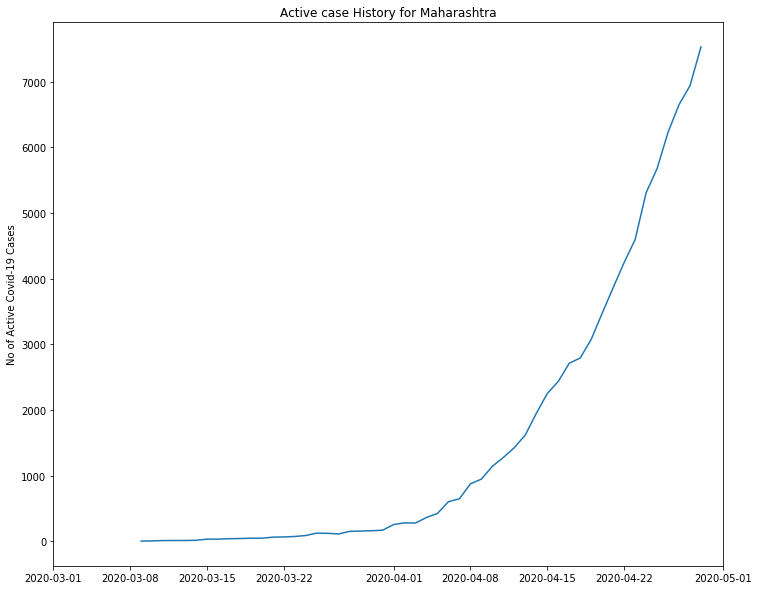

In [524]:
f, ax = plt.subplots(1,1, figsize=(12,10))
plt.plot(activecases)
ax.set_ylabel("No of Active Covid-19 Cases")
title = 'Active case History for ' + stateName
ax.set_title(title)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 5, 1)])

# Simple Exponential Smoothing and Holt's Winter Model for Maharashtra

In [525]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

In [526]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]

fit1 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(len_forecast).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(len_forecast).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit()
fcast3 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fit4 = ExponentialSmoothing(df_per_State_features['Active Cases']).fit(damping_slope=.2, smoothing_level=.1)
fcast4 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit4.model.params['smoothing_level'])

In [527]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

pred_fcast4 =  pd.Series(fcast4.values, pred_index)
pred_fitval_fcast4 =  pd.Series(fit4.fittedvalues.values, index)

Text(0.5, 1.0, 'Active case Flattening curve for Maharashtra')

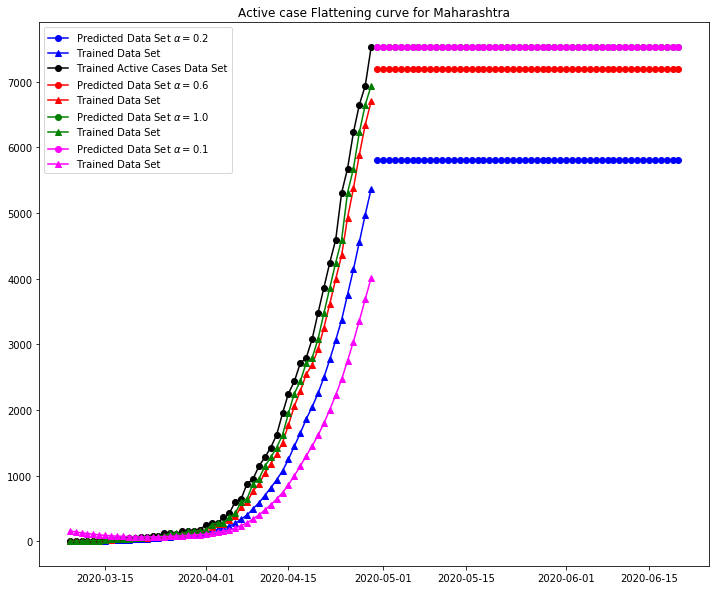

In [528]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Data Set " + r'$\alpha=0.2$')
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Data Set")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Data Set " + r'$\alpha=0.6$')
plt.plot(pred_fitval_fcast2, marker='^',color='red',label ="Trained Data Set")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Data Set " + r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Data Set")

plt.plot(pred_fcast4, marker='o',color='magenta',label ="Predicted Data Set " r'$\alpha=%s$'%fit4.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast4, marker='^',color='magenta',label ="Trained Data Set")

plt.legend()
ax.set_title('Active case Flattening curve for ' + stateName)

# Holt's Winter Tseries Prediction

In [603]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

In [604]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]
fit1 = Holt(df_per_State_features['Active Cases']).fit(smoothing_level=1.1, smoothing_slope=1.6, optimized=False)
fcast1 = fit1.forecast(len_forecast).rename("Holt's linear trend")
fit2 = Holt(df_per_State_features['Active Cases'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(len_forecast).rename("Exponential trend")
fit3 = Holt(df_per_State_features['Active Cases'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(len_forecast).rename("Additive damped trend")

In [605]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

(52,)
(52,)


Text(0.5, 1.0, "Holt's Winter Time Series Active Cases Prediction to Flatten the curve for Maharashtra")

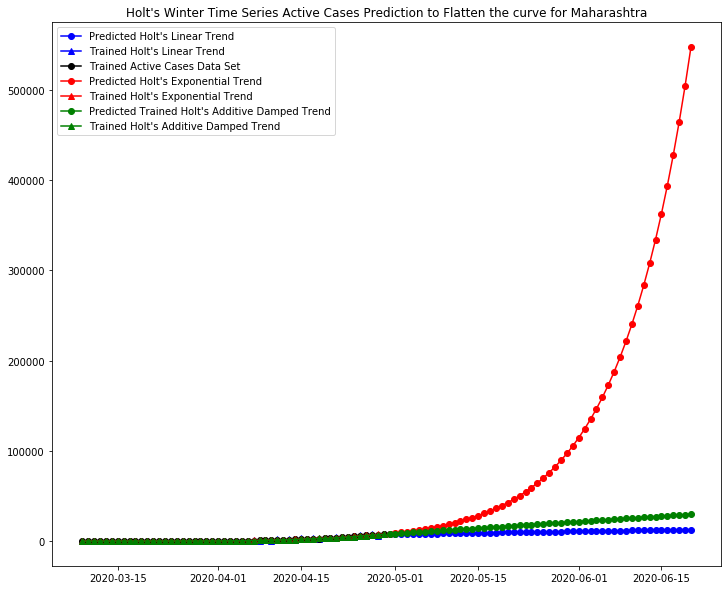

In [591]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Holt\'s Linear Trend")
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Holt\'s Linear Trend")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Holt\'s Exponential Trend")
plt.plot(pred_fitval_fcast2, marker='^',color='red',label = "Trained Holt\'s Exponential Trend")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Trained Holt\'s Additive Damped Trend")
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Holt\'s Additive Damped Trend")

plt.legend()
ax.set_title('Holt\'s Winter Time Series Active Cases Prediction to Flatten the curve for ' + stateName)

In [558]:
fit1 = SimpleExpSmoothing(activecases).fit()
fit2 = Holt(activecases).fit()
fit3 = Holt(activecases,exponential=True).fit()
fit4 = Holt(activecases,damped=True).fit(damping_slope=0.98)
fit5 = Holt(activecases,exponential=True,damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.0,0.733690,0.857479,0.704251,0.792807
$\beta$,NaN,0.596042,0.443215,0.704251,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.963365
$l_0$,2.0,1.133794,10.155727,1.970278,1.597037
$b_0$,NaN,1.729742,0.373937,2.955457,1.661691
SSE,2766034.0,391447.021221,478453.853630,405425.953437,289718.159808


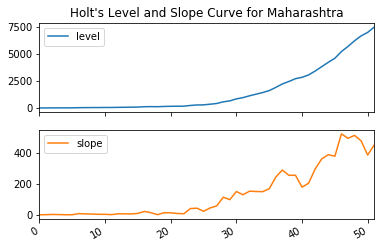

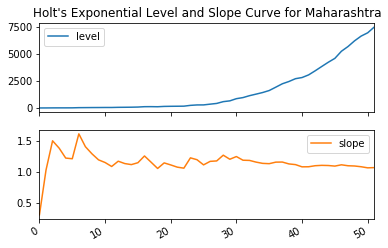

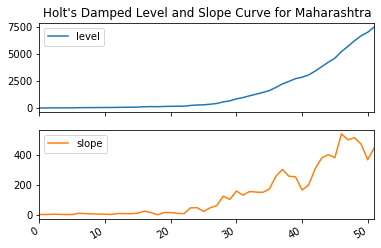

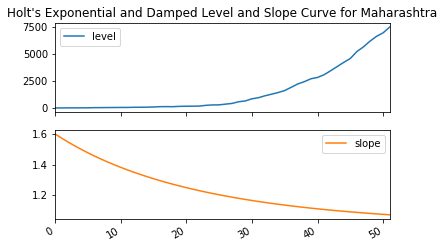

In [559]:
title_sub = ['Holt\'s', 'Holt\'s Exponential', 'Holt\'s Damped', 'Holt\'s Exponential and Damped']
count = 0
for fit in [fit2, fit3, fit4, fit5]:
    ax = pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)

    title = title_sub[count] + ' Level and Slope Curve for ' +  stateName
    ax[0].set_title(title)
    count = count + 1 

In [560]:
#Auto Co-relation plot 


# Auto Correlation and Dickey-Fuller test 

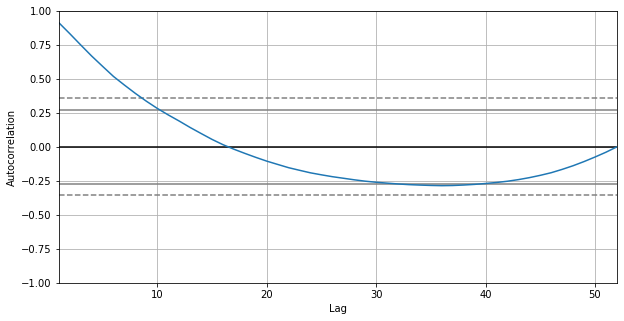

In [98]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(activecases)

In [99]:
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller test for Original Time Series")
dftest = adfuller(activecases, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller test for Original Time Series
Test Statistic                 -1.010263
p-value                         0.749503
#Lags Used                     10.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [100]:
log_series=np.log(activecases)
print("Results of Dickey-Fuller test for Log Transformed Time-Series")
dftest = adfuller((log_series.diff().diff()).dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
stationary=(log_series.diff().diff()).dropna()

Results of Dickey-Fuller test for Log Transformed Time-Series
Test Statistic                 -2.404740
p-value                         0.140403
#Lags Used                     11.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


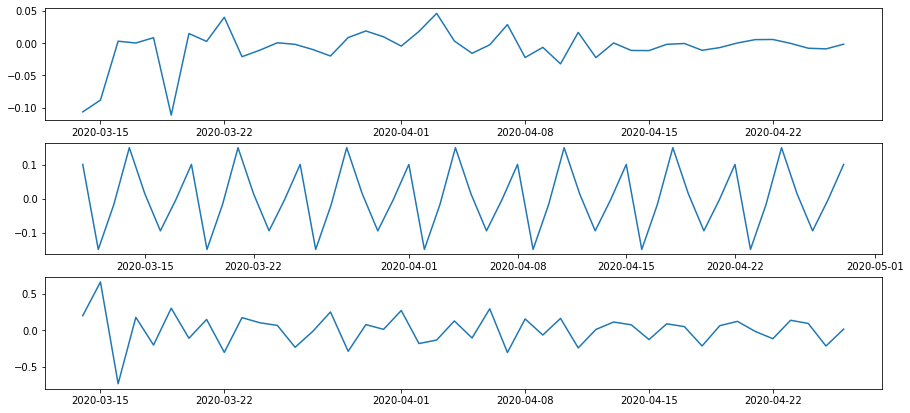

In [101]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1,figsize=(15,7))
import statsmodels.api as sm
results=sm.tsa.seasonal_decompose(stationary)
ax1.plot(results.trend)
ax2.plot(results.seasonal)
ax3.plot(results.resid)

# Preparing Datasets

In [630]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values


In [631]:
#TO DO
# plt.figure(figsize=(15,5))
# sns.heatmap(totActiveCases, annot=True, fmt='D', cmap='YlGnBu')
# plt.show()

# AR, MA and ARIMA Model

# AR model

In [632]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -177.548
Method:                       css-mle   S.D. of innovations             37.350
Date:                Tue, 12 May 2020   AIC                            363.097
Time:                        00:47:13   BIC                            369.318
Sample:                             1   HQIC                           365.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.2223     57.404      1.223      0.221     -42.288     182.732
ar.L1.D.y      0.1723      0.102      1.684      0.092      -0.028       0.373
ar.L2.D.y      0.7534      0.105      7.197      0.0

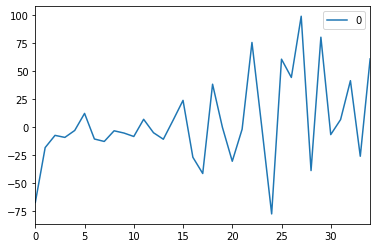

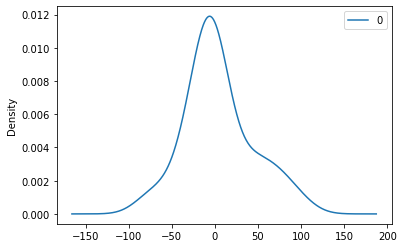

               0
count  35.000000
mean    4.193288
std    39.077140
min   -77.488732
25%   -11.779260
50%    -3.246321
75%    18.099638
max    99.060613
Root Mean Square Error for AR Model:  1858.5381088311121


In [633]:
model_ar = ARIMA(trainActiveCases, order=(2, 1, 0))  
model_ar_fit = model_ar.fit()  

prediction_ar=model_ar_fit.forecast(len(validActiveCases))[0]

print(model_ar_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_ar_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))

Text(0.5, 1.0, 'Active Cases AR Model Forecasting for state Maharashtra')

<Figure size 720x360 with 0 Axes>

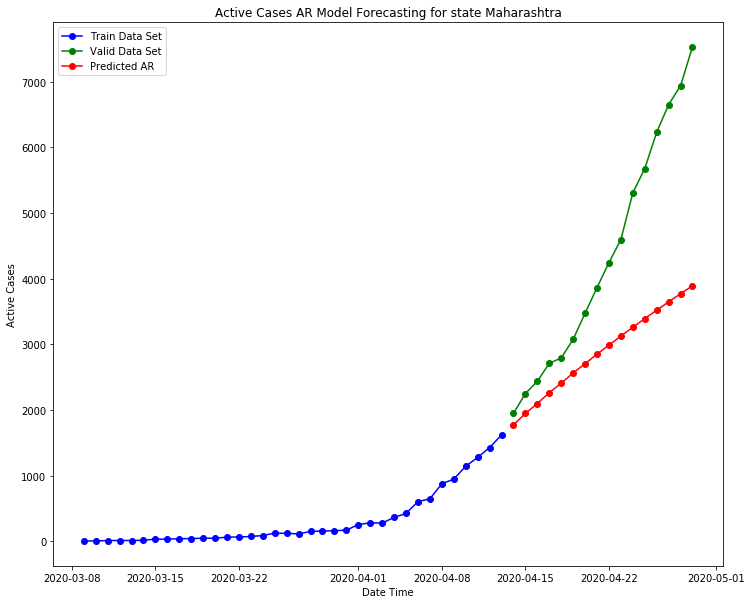

In [634]:
plt.figure(figsize=(10,5))

index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_ar, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted AR")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases AR Model Forecasting for state " + stateName)


# MA Model

In [635]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -187.110
Method:                       css-mle   S.D. of innovations             50.232
Date:                Tue, 12 May 2020   AIC                            382.221
Time:                        00:47:16   BIC                            388.442
Sample:                             1   HQIC                           384.368
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.2739     15.800      3.055      0.002      17.306      79.242
ma.L1.D.y      0.3669      0.205      1.790      0.073      -0.035       0.769
ma.L2.D.y      0.5337      0.113      4.732      0.0

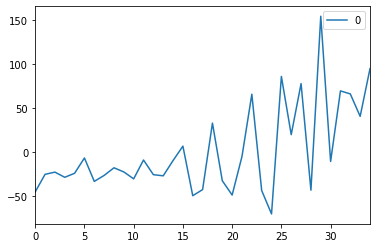

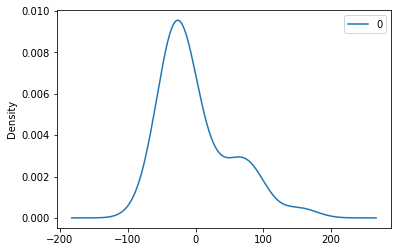

                0
count   35.000000
mean     0.320516
std     51.201521
min    -70.261562
25%    -31.508502
50%    -22.600590
75%     26.282137
max    154.158057
Root Mean Square Error for MA Model:  2707.2598694373273


In [636]:
model_ma = ARIMA(trainActiveCases, order=(0, 1, 2))  
model_ma_fit = model_ma.fit()  

prediction_ma=model_ma_fit.forecast(len(validActiveCases))[0]

print(model_ma_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_ma_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_ma)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ma)))

Text(0.5, 1.0, 'Active Cases MA Model Forecasting for state Maharashtra')

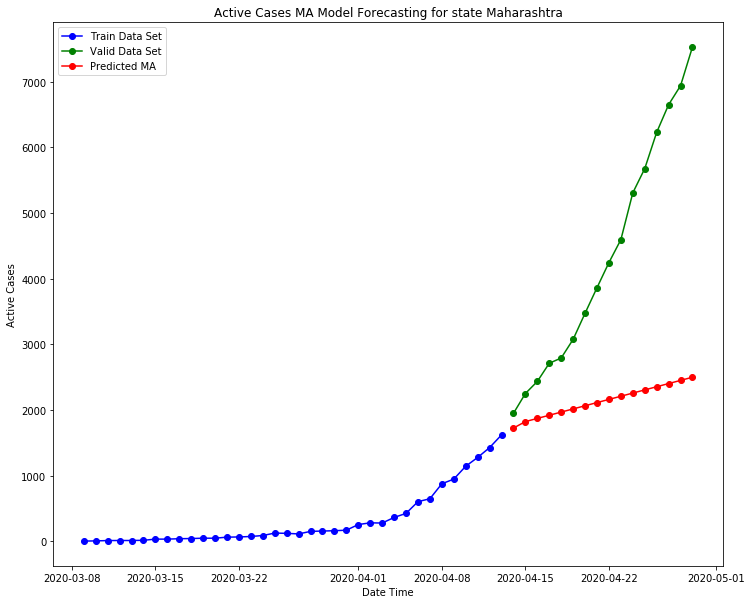

In [637]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_ma, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted MA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases MA Model Forecasting for state " + stateName)

# ARIMA Model

In [711]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning:

divide by zero encountered in true_divide

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in exp



                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -184.091
Method:                       css-mle   S.D. of innovations             45.604
Date:                Tue, 12 May 2020   AIC                            376.183
Time:                        22:41:35   BIC                            382.404
Sample:                             1   HQIC                           378.330
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4327     58.939      1.178      0.239     -46.085     184.950
ar.L1.D.y      0.9701      0.038     25.588      0.000       0.896       1.044
ma.L1.D.y     -0.6270      0.098     -6.393      0.0

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



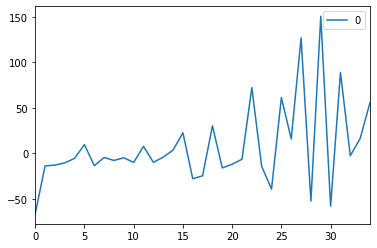

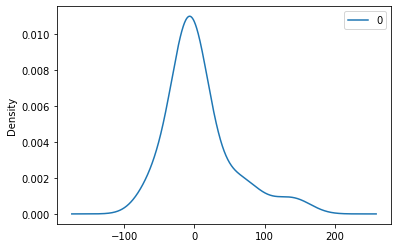

                0
count   35.000000
mean     6.979336
std     46.678893
min    -66.432670
25%    -13.691315
50%     -5.448975
75%     16.081177
max    150.464231
Root Mean Square Error for MA Model:  1910.1991565239025


In [712]:
model_arima = ARIMA(trainActiveCases, order=(1, 1, 1))  
model_arima_fit = model_arima.fit()  


prediction_arima=model_arima_fit.forecast(len(validActiveCases))[0]
valid_ml["ARIMA Model Prediction"]=list(np.exp(prediction_ar))

print(model_arima_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_arima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_arima)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_arima)))

Text(0.5, 1.0, 'Active Cases ARIMA Model Forecasting for state Maharashtra')

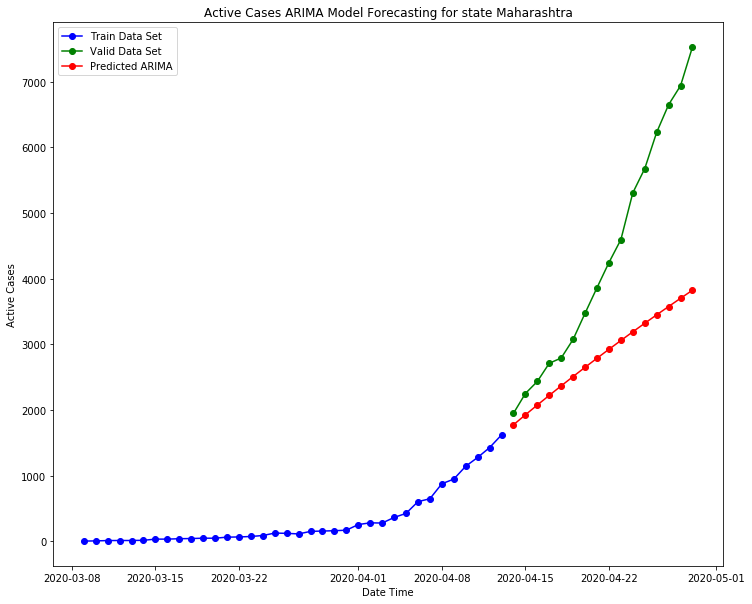

In [713]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_arima, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted ARIMA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases ARIMA Model Forecasting for state " + stateName)

# Auto-ARIMA models - AR, MA, ARIMA and SARIMA

# Auto-ARIMA AR model

In [770]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values


Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=382.622, BIC=385.675, Time=0.006 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=348.099, BIC=352.678, Time=0.027 seconds
Fit ARIMA(2,2,0)x(0,0,0,0) [intercept=True]; AIC=346.956, BIC=353.062, Time=0.034 seconds
Fit ARIMA(3,2,0)x(0,0,0,0) [intercept=True]; AIC=348.523, BIC=356.155, Time=0.050 seconds
Fit ARIMA(4,2,0)x(0,0,0,0) [intercept=True]; AIC=349.819, BIC=358.977, Time=0.055 seconds
Fit ARIMA(5,2,0)x(0,0,0,0) [intercept=True]; AIC=343.057, BIC=353.742, Time=0.105 seconds
Total fit time: 0.281 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(5, 2, 0)   Log Likelihood                -164.529
Date:                Tue, 12 May 2020   AIC                            343.057
Time:                        23:12:27   BIC                            353.742
Sample:                            

<Figure size 720x720 with 0 Axes>

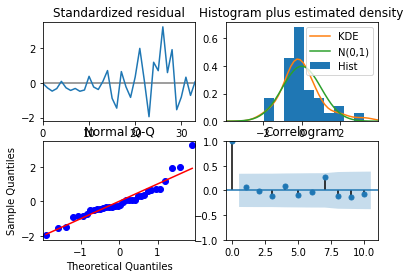

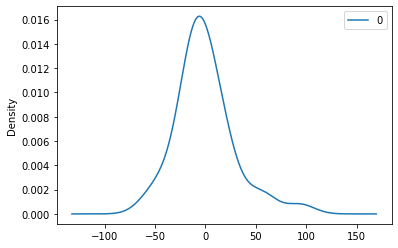

In [771]:
model_ar= auto_arima(trainActiveCases,trace=True, error_action='ignore', start_p=0,start_q=0,max_p=5,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar_fit = model_ar.fit(trainActiveCases)
prediction_ar=model_ar_fit.predict(len(validActiveCases))

print(model_ar_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_ar_fit.resid())
model_ar_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [772]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))
print("Root Mean Square Error for Auto ARIMA AR Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))

Root Mean Square Error for Auto ARIMA AR Model:  1416.7114296446698


Text(0.5, 1.0, 'Active Cases Auto AR (ARIMA) Model Forecasting for state Maharashtra')

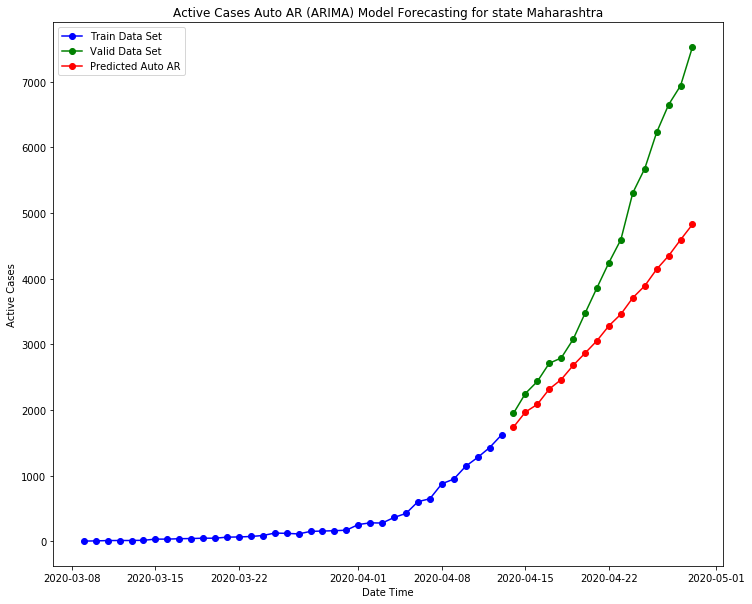

In [773]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_ar, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted Auto AR")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases Auto AR (ARIMA) Model Forecasting for state " + stateName)

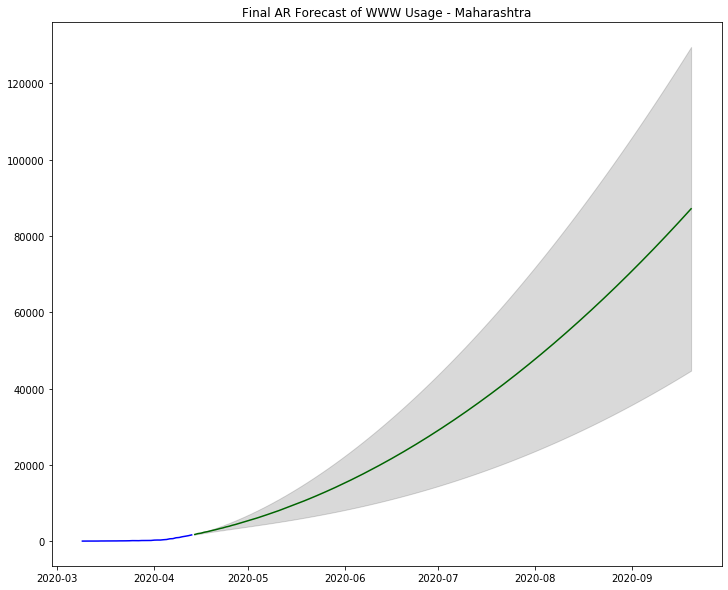

In [774]:
# Forecast over 4-5 months
n_periods = 160
fc, confint = model_ar_fit.predict(n_periods=n_periods, return_conf_int=True)
valid_index = pd.date_range(start=valid_dates[0], periods=n_periods, freq='D')


train_active =  pd.Series(train_ml['Active Cases'].values, index)

# make series for plotting purpose
fc_series = pd.Series(fc, index=valid_index)

lower_series = pd.Series(confint[:, 0], index=valid_index)
upper_series = pd.Series(confint[:, 1], index=valid_index)

# Plot
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, color='blue')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final AR Forecast of WWW Usage - Maharashtra")
plt.show()

# Auto-ARIMA MA model

In [755]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values


Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=382.622, BIC=385.675, Time=0.007 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=359.364, BIC=363.944, Time=0.036 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=348.307, BIC=354.413, Time=0.049 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=349.400, BIC=357.032, Time=0.062 seconds
Total fit time: 0.157 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -170.154
Date:                Tue, 12 May 2020   AIC                            348.307
Time:                        23:11:32   BIC                            354.413
Sample:                             0   HQIC                           350.390
                                 - 36                                         
Covariance Type:                  opg                    

<Figure size 720x720 with 0 Axes>

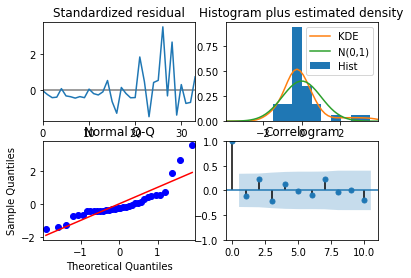

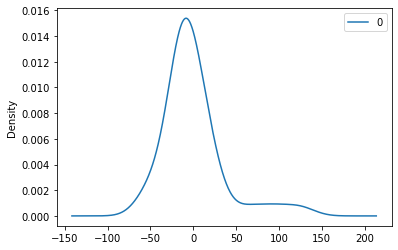

In [756]:
model_ma= auto_arima(trainActiveCases,trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma_fit = model_ma.fit(trainActiveCases)
prediction_ma=model_ma_fit.predict(len(validActiveCases))

print(model_ma_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_ma_fit.resid())
model_ma_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [757]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_ma)))
print("Root Mean Square Error for Auto ARIMA MA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ma)))

Root Mean Square Error for Auto ARIMA MA Model:  1376.3478555888162


Text(0.5, 1.0, 'Active Cases Auto MA (ARIMA) Model Forecasting for state Maharashtra')

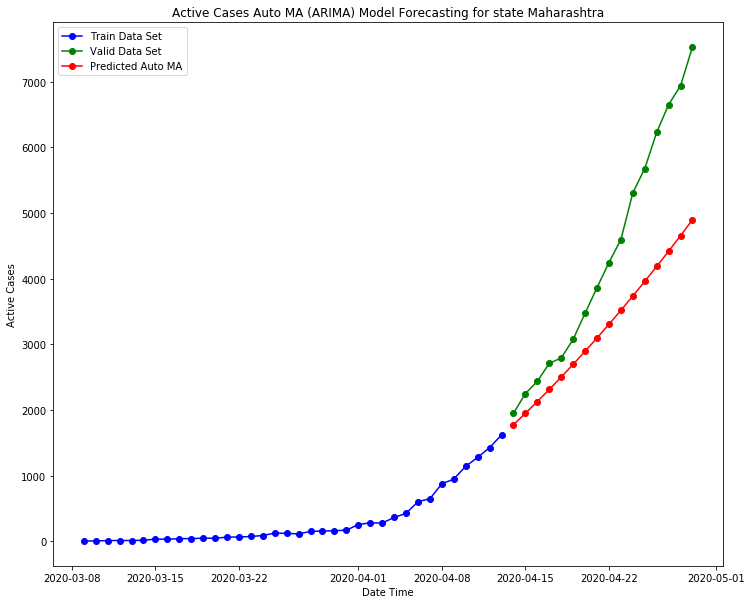

In [758]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_ma, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted Auto MA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases Auto MA (ARIMA) Model Forecasting for state " + stateName)

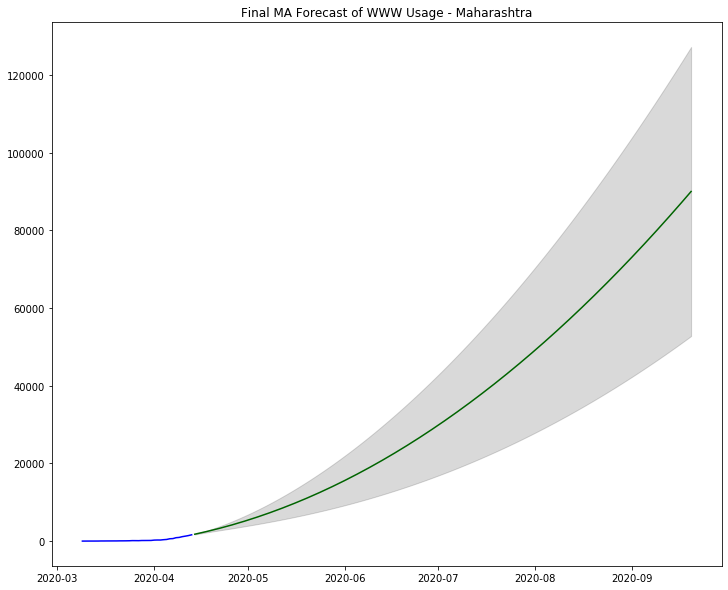

In [759]:
# Forecast over 4-5 months
n_periods = 160
fc, confint = model_ma_fit.predict(n_periods=n_periods, return_conf_int=True)
valid_index = pd.date_range(start=valid_dates[0], periods=n_periods, freq='D')


train_active =  pd.Series(train_ml['Active Cases'].values, index)

# make series for plotting purpose
fc_series = pd.Series(fc, index=valid_index)

lower_series = pd.Series(confint[:, 0], index=valid_index)
upper_series = pd.Series(confint[:, 1], index=valid_index)

# Plot
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, color='blue')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final MA Forecast of WWW Usage - Maharashtra")
plt.show()

# Auto ARIMA Model

In [760]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values


Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=382.622, BIC=385.675, Time=0.006 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=359.364, BIC=363.944, Time=0.037 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=348.307, BIC=354.413, Time=0.048 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=349.400, BIC=357.032, Time=0.061 seconds
Fit ARIMA(0,2,4)x(0,0,0,0) [intercept=True]; AIC=349.188, BIC=358.346, Time=0.091 seconds
Fit ARIMA(0,2,5)x(0,0,0,0) [intercept=True]; AIC=345.237, BIC=355.921, Time=0.105 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=348.099, BIC=352.678, Time=0.025 seconds
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=346.637, BIC=352.743, Time=0.047 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=348.296, BIC=355.928, Time=0.069 seconds
Fit ARIMA(1,2,3)x(0,0,0,0) [intercept=True]; AIC=349.574, BIC=358.732, Time=0.065 seconds
Fit ARIMA(1,2,4)x(0,0,0,0) [intercept=True]; AIC=343.251, BIC=353.936, Time=0.126 seconds
Fit ARIMA(

<Figure size 720x720 with 0 Axes>

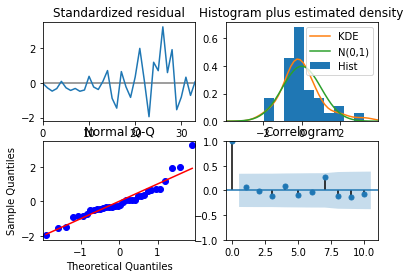

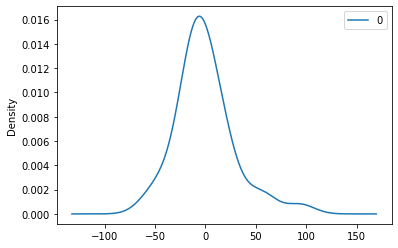

In [761]:
model_arima= auto_arima(trainActiveCases,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima_fit = model_arima.fit(trainActiveCases)
prediction_arima=model_arima_fit.predict(len(validActiveCases))

print(model_arima_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_arima_fit.resid())
model_arima_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [762]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_arima)))
print("Root Mean Square Error for Auto ARIMA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_arima)))

Root Mean Square Error for Auto ARIMA Model:  1416.7114296446698


Text(0.5, 1.0, 'Active Cases Auto ARIMA Model Forecasting for state Maharashtra')

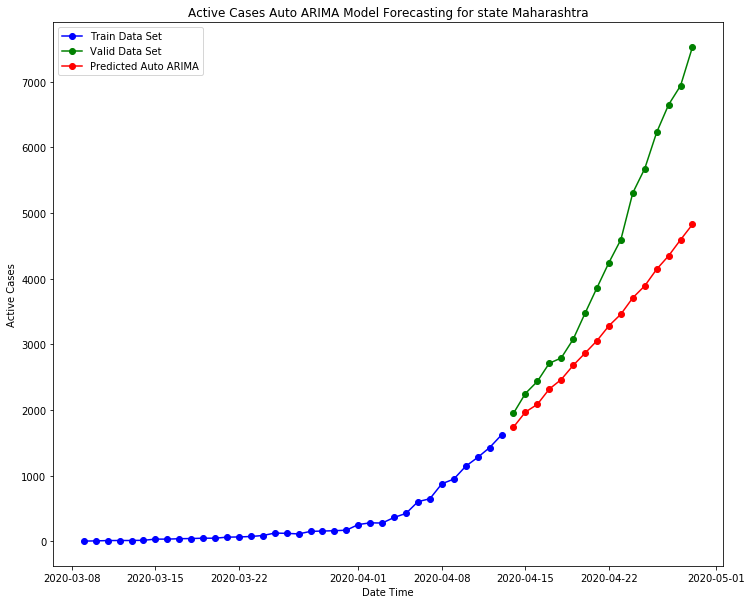

In [763]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =   pd.Series(prediction_arima, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted Auto ARIMA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases Auto ARIMA Model Forecasting for state " + stateName)

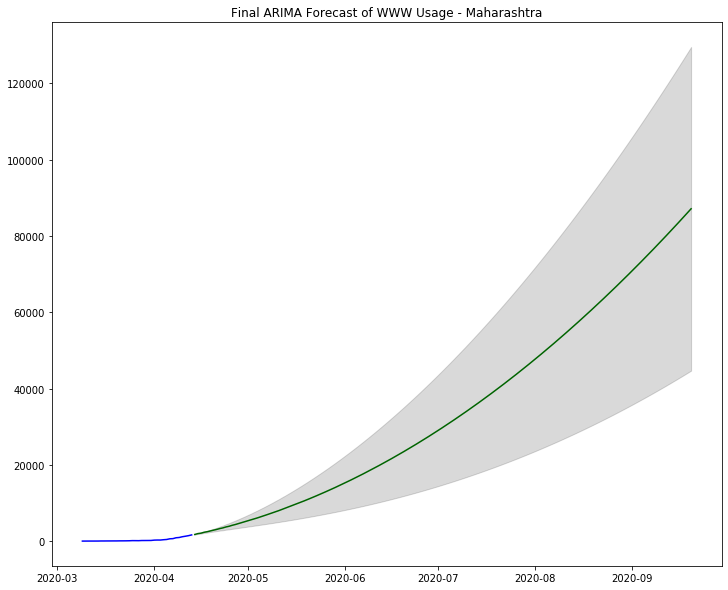

In [764]:
# Forecast over 4-5 months
n_periods = 160
fc, confint = model_arima_fit.predict(n_periods=n_periods, return_conf_int=True)
valid_index = pd.date_range(start=valid_dates[0], periods=n_periods, freq='D')


train_active =  pd.Series(train_ml['Active Cases'].values, index)

# make series for plotting purpose
fc_series = pd.Series(fc, index=valid_index)

lower_series = pd.Series(confint[:, 0], index=valid_index)
upper_series = pd.Series(confint[:, 1], index=valid_index)

# Plot
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, color='blue')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final ARIMA Forecast of WWW Usage - Maharashtra")
plt.show()

# Auto SARIMA Model

In [765]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(1,0,1,12) [intercept=True]; AIC=386.467, BIC=392.573, Time=0.100 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=True]; AIC=382.622, BIC=385.675, Time=0.005 seconds
Fit ARIMA(1,2,0)x(1,0,0,12) [intercept=True]; AIC=350.089, BIC=356.195, Time=0.052 seconds
Fit ARIMA(0,2,1)x(0,0,1,12) [intercept=True]; AIC=361.239, BIC=367.345, Time=0.066 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=False]; AIC=380.885, BIC=382.412, Time=0.005 seconds
Fit ARIMA(1,2,0)x(0,0,0,12) [intercept=True]; AIC=348.099, BIC=352.678, Time=0.024 seconds
Fit ARIMA(1,2,0)x(0,0,1,12) [intercept=True]; AIC=350.089, BIC=356.194, Time=0.032 seconds
Fit ARIMA(1,2,0)x(1,0,1,12) [intercept=True]; AIC=352.063, BIC=359.695, Time=0.166 seconds
Near non-invertible roots for order (1, 2, 0)(1, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(2,2,0)x(0,0,0,12) [intercept=True]; AIC=346.956, BIC=353.06

<Figure size 720x720 with 0 Axes>

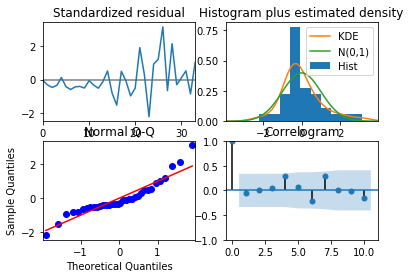

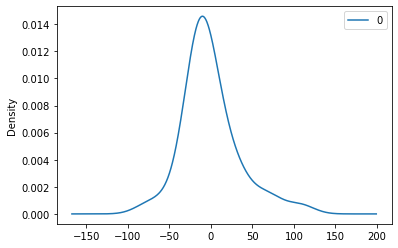

In [766]:
model_sarima= auto_arima(trainActiveCases,trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=5,max_q=5,m=12,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima_fit = model_sarima.fit(trainActiveCases)
prediction_sarima=model_sarima_fit.predict(len(validActiveCases))

print(model_sarima_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_sarima_fit.resid())
model_sarima_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [767]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_sarima)))
print("Root Mean Square Error for Auto SARIMA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_sarima)))

Root Mean Square Error for Auto SARIMA Model:  1309.155086192139


Text(0.5, 1.0, 'Active Cases Auto SARIMA Model Forecasting for state Maharashtra')

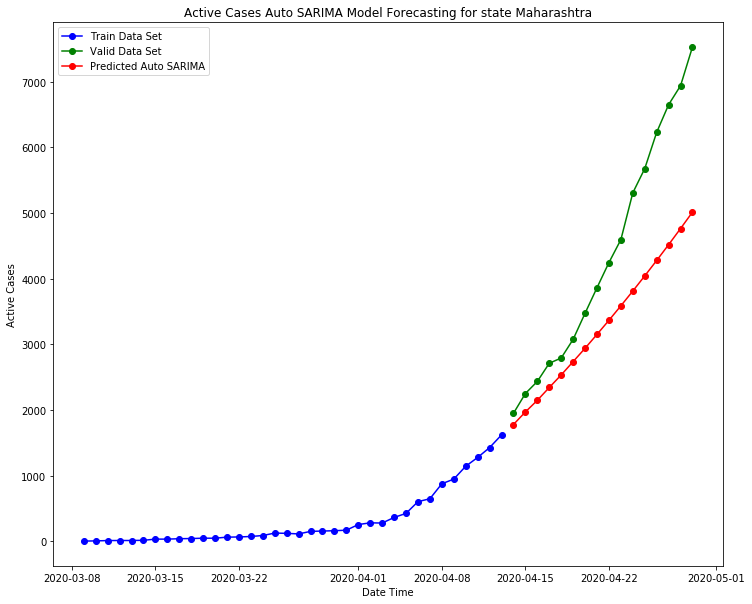

In [768]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =   pd.Series(prediction_sarima, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted Auto SARIMA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases Auto SARIMA Model Forecasting for state " + stateName)

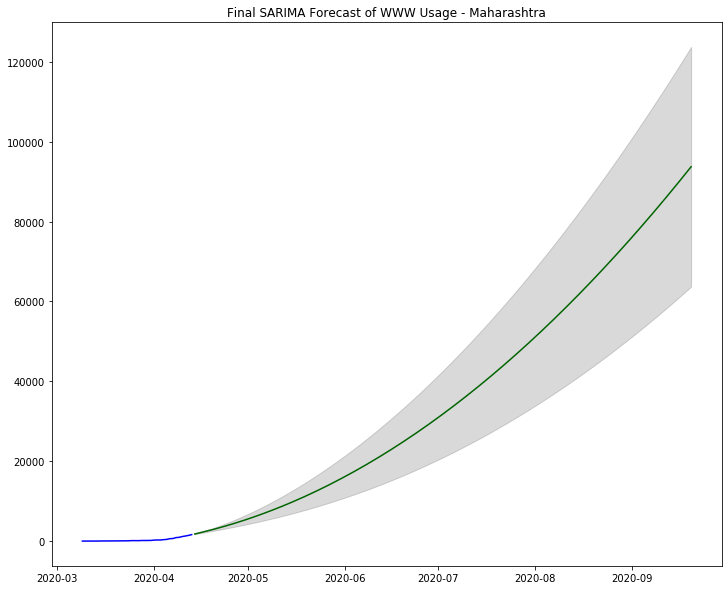

In [769]:
# Forecast over 4-5 months
n_periods = 160
fc, confint = model_sarima_fit.predict(n_periods=n_periods, return_conf_int=True)
valid_index = pd.date_range(start=valid_dates[0], periods=n_periods, freq='D')


train_active =  pd.Series(train_ml['Active Cases'].values, index)

# make series for plotting purpose
fc_series = pd.Series(fc, index=valid_index)

lower_series = pd.Series(confint[:, 0], index=valid_index)
upper_series = pd.Series(confint[:, 1], index=valid_index)

# Plot
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, color='blue')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final SARIMA Forecast of WWW Usage - Maharashtra")
plt.show()

# Prophet Model from Facebook

In [664]:
df_per_State_features = df_state_recs[9]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

df_per_State_features['Date'] = pd.to_datetime(df_per_State_features['Date'])

In [665]:
prophet_a=Prophet(interval_width=0.95,weekly_seasonality=True)
prophet_active=pd.DataFrame(zip(list(df_per_State_features['Date']),list(df_per_State_features['Active Cases'])),columns=['ds','y'])

prophet_a.fit(prophet_active)
future_active = prophet_a.make_future_dataframe(periods=365)
future_active.tail()

forecast_active = prophet_a.predict(future_active)
forecast_active[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds,yhat,yhat_lower,yhat_upper
412,2021-04-25,160549.326301,41751.887604,286547.295716
413,2021-04-26,160977.898079,41776.593039,287437.406089
414,2021-04-27,161386.516704,41796.122128,288620.912377
415,2021-04-28,161859.460046,41660.402372,289909.455489
416,2021-04-29,162239.229759,41367.080247,290870.940173


In [666]:
prophet_active_forecast=forecast_active.copy()

In [667]:
active_cases_forecast=prophet_a.predict(future_active)

In [668]:
model_scores.append(np.sqrt(mean_squared_error(totActiveCases,forecast_active['yhat'].head(df_per_State_features.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(totActiveCases,forecast_active['yhat'].head(df_per_State_features.shape[0]))))

Root Mean Squared Error for Prophet Model:  70.122739112006


Figure(720x432)


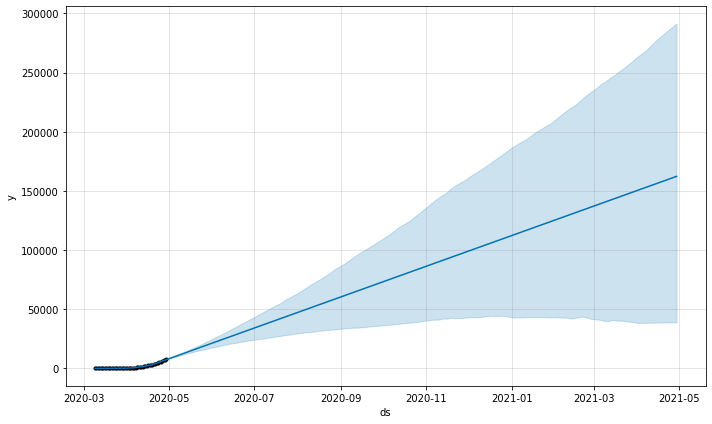

In [669]:
print(prophet_a.plot(active_cases_forecast))

Figure(648x432)


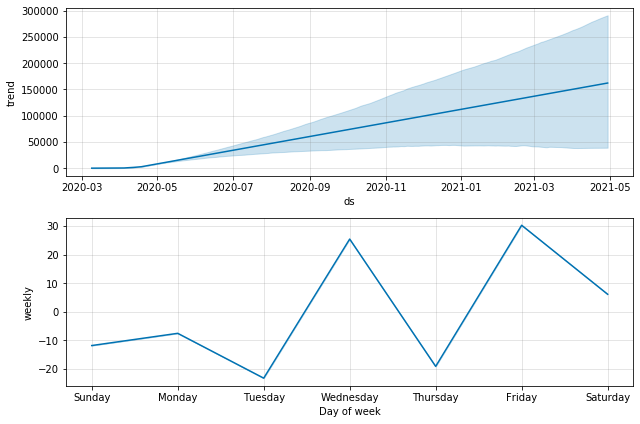

In [670]:
print(prophet_a.plot_components(active_cases_forecast))

# VARMAX models

In [742]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values


In [743]:
df_per_State_features.index = df_per_State_features.Date
print(train_ml.columns)

Index(['Unnamed: 0', 'index', 'Date', 'Name of State / UT',
       'Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases',
       'Active Cases', 'LiteracyRate', 'PopulationDensity', 'ElderlyRate',
       'DistrictsEffected', 'NoRedZones', 'NoOrangeZones', 'NoGreenZones',
       'InternationalAirports', 'IntAirportPassenger', 'Rate_per_3_days',
       'Rate_per_5_days', 'Rate_per_7_days', 'Rate_per_15_days',
       'Rate_per_21_days', 'is_curve_flattened', 'Days Since'],
      dtype='object')


In [744]:
train_var_ml = train_ml[['Cured/Discharged/Migrated','Death', 'Active Cases']]
valid_var_ml = valid_ml[['Cured/Discharged/Migrated','Death', 'Active Cases', 'Total Confirmed cases']]

In [745]:
mod = sm.tsa.VARMAX(endog=train_var_ml, order=(2,0), trend='n')#exog=exog
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                             Statespace Model Results                                             
Dep. Variable:     ['Cured/Discharged/Migrated', 'Death', 'Active Cases']   No. Observations:                   36
Model:                                                             VAR(2)   Log Likelihood                -392.727
Date:                                                    Tue, 12 May 2020   AIC                            833.455
Time:                                                            23:06:46   BIC                            871.459
Sample:                                                        03-09-2020   HQIC                           846.719
                                                             - 04-13-2020                                         
Covariance Type:                                                      opg                                         
Ljung-Box (Q):          12.02, 25.79, 40.28   Jarque-Bera (JB):    9.39, 42.99, 

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Text(0.5, 1.0, 'VARMAX based AR Forecasting for state Maharashtra')

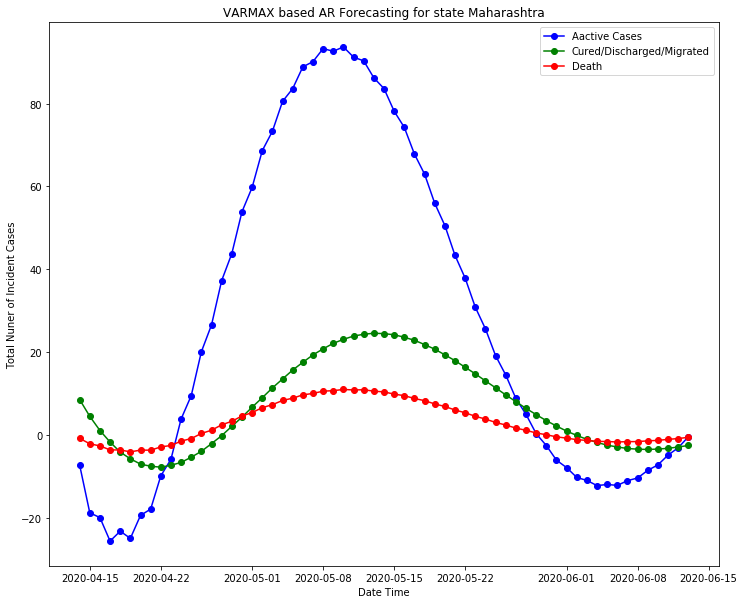

In [746]:
valid_index = pd.date_range(start=valid_dates[0], periods=61, freq='D')
pred = res.impulse_responses(60, orthogonalized=True)

a_vr_Series = pd.Series(pred['Active Cases'].values, index=valid_index)
c_vr_Series = pd.Series(pred['Cured/Discharged/Migrated'].values, index=valid_index)
d_vr_Series = pd.Series(pred['Death'].values, index=valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(a_vr_Series, marker='o',color='blue',label ="Aactive Cases")
plt.plot(c_vr_Series, marker='o',color='green',label ="Cured/Discharged/Migrated")
plt.plot(d_vr_Series, marker='o',color='red',label ="Death")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Total Nuner of Incident Cases')
plt.title("VARMAX (Vector Autoregressive Model with Exogenous Variables) based AR Forecasting for state " + stateName)

# VMA  Model (Vector Moving Average Model)

In [747]:
train_var_ml = train_ml[['Cured/Discharged/Migrated','Death', 'Active Cases']]
valid_var_ml = valid_ml[['Cured/Discharged/Migrated','Death', 'Active Cases']]

In [748]:
mod = sm.tsa.VARMAX(endog=train_var_ml, order=(0,2),  trend='n', error_cov_type='diagonal')
res = mod.fit(maxiter=100, disp=False)
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                             Statespace Model Results                                             
Dep. Variable:     ['Cured/Discharged/Migrated', 'Death', 'Active Cases']   No. Observations:                   36
Model:                                                             VMA(2)   Log Likelihood                -512.464
Date:                                                    Tue, 12 May 2020   AIC                           1066.927
Time:                                                            23:09:51   BIC                           1100.181
Sample:                                                        03-09-2020   HQIC                          1078.534
                                                             - 04-13-2020                                         
Covariance Type:                                                      opg                                         
Ljung-Box (Q):          60.98, 59.34, 129.26   Jarque-Bera (JB):    0.60, 30.36,

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Text(0.5, 1.0, 'VARMAX (Vector Autoregressive Model with Exogenous Variables) based MA Forecasting for state Maharashtra')

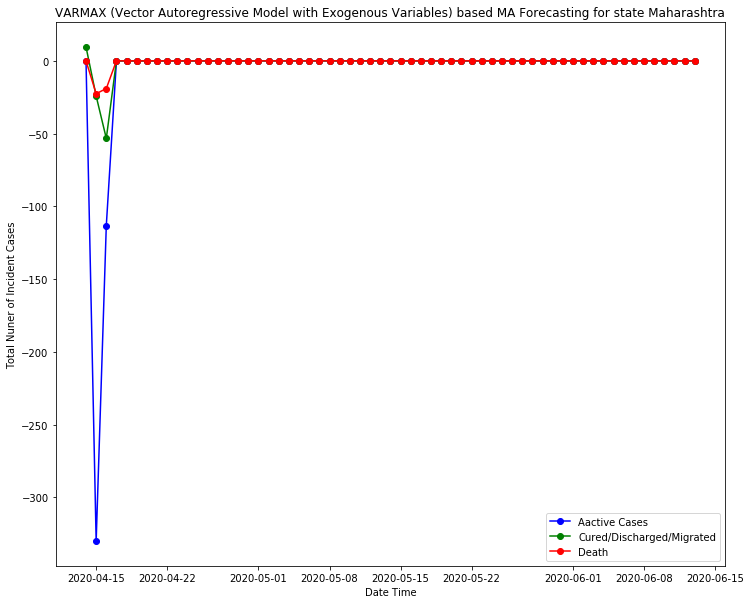

In [749]:
valid_index = pd.date_range(start=valid_dates[0], periods=61, freq='D')
pred = res.impulse_responses(60, orthogonalized=True)

a_vr_Series = pd.Series(pred['Active Cases'].values, index=valid_index)
c_vr_Series = pd.Series(pred['Cured/Discharged/Migrated'].values, index=valid_index)
d_vr_Series = pd.Series(pred['Death'].values, index=valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(a_vr_Series, marker='o',color='blue',label ="Aactive Cases")
plt.plot(c_vr_Series, marker='o',color='green',label ="Cured/Discharged/Migrated")
plt.plot(d_vr_Series, marker='o',color='red',label ="Death")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Total Nuner of Incident Cases')
plt.title("VARMAX (Vector Autoregressive Model with Exogenous Variables) based MA Forecasting for state " + stateName)

# VARMA (Vector Auto Regressive Moving Average Model )model

In [750]:
train_var_ml = train_ml[['Cured/Discharged/Migrated','Death', 'Active Cases']]
valid_var_ml = valid_ml[['Cured/Discharged/Migrated','Death', 'Active Cases']]

In [751]:
mod = sm.tsa.VARMAX(endog=train_var_ml, order=(1,1),  trend='n', error_cov_type='diagonal')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                             Statespace Model Results                                             
Dep. Variable:     ['Cured/Discharged/Migrated', 'Death', 'Active Cases']   No. Observations:                   36
Model:                                                         VARMA(1,1)   Log Likelihood                -412.052
Date:                                                    Tue, 12 May 2020   AIC                            866.104
Time:                                                            23:09:59   BIC                            899.358
Sample:                                                        03-09-2020   HQIC                           877.711
                                                             - 04-13-2020                                         
Covariance Type:                                                      opg                                         
Ljung-Box (Q):           46.10, 21.19, 26.88   Jarque-Bera (JB):    2.66, 2.40, 

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Text(0.5, 1.0, 'VARMAX (Vector Autoregressive Model with Exogenous Variables) based ARIMAA Forecasting for state Maharashtra')

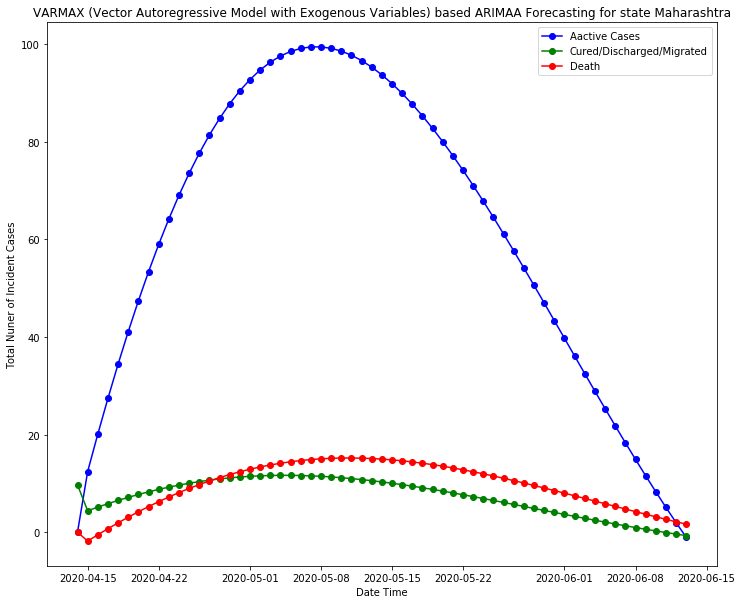

In [752]:
valid_index = pd.date_range(start=valid_dates[0], periods=61, freq='D')
pred = res.impulse_responses(60, orthogonalized=True)

a_vr_Series = pd.Series(pred['Active Cases'].values, index=valid_index)
c_vr_Series = pd.Series(pred['Cured/Discharged/Migrated'].values, index=valid_index)
d_vr_Series = pd.Series(pred['Death'].values, index=valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(a_vr_Series, marker='o',color='blue',label ="Aactive Cases")
plt.plot(c_vr_Series, marker='o',color='green',label ="Cured/Discharged/Migrated")
plt.plot(d_vr_Series, marker='o',color='red',label ="Death")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Total Nuner of Incident Cases')
plt.title("VARMAX (Vector Autoregressive Model with Exogenous Variables) based ARIMAA Forecasting for state " + stateName)

# LSTM based Prediction  #TO DO Under-progress

In [753]:
from keras import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [754]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

RuntimeError: It looks like you are trying to use a version of multi-backend Keras that does not support TensorFlow 2.0. We recommend using `tf.keras`, or alternatively, downgrading to TensorFlow 1.14.

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X, y, epochs=200, batch_size=32)

In [ ]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Opening price of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()